In [14]:
import sys

sys.path.append("/home/code")

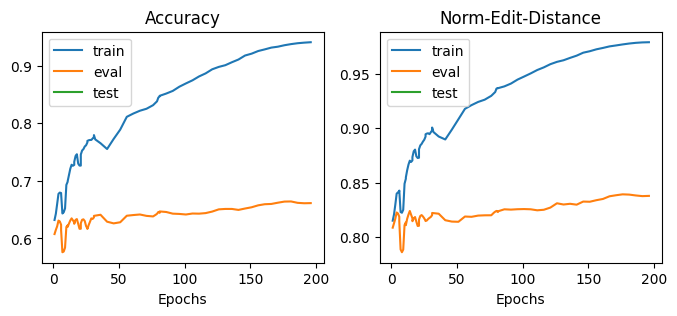

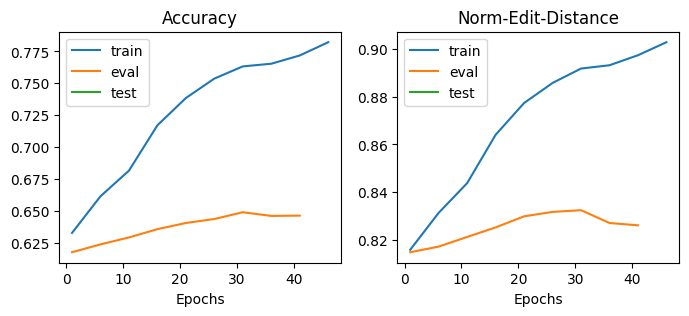

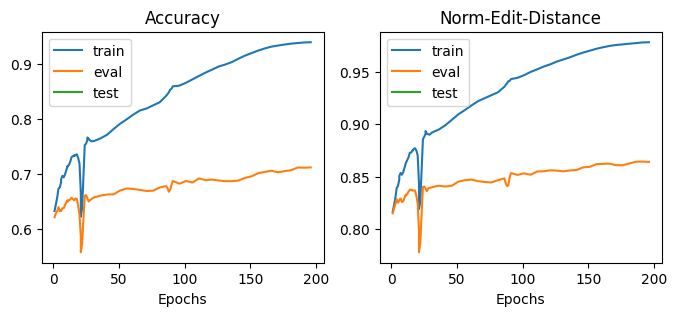

In [7]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

for work in ["rec_PPOCR_sangmu_and_outsourcing_final_v7_1", "rec_PPOCR_sangmu_and_outsourcing_final_v7_2", "rec_PPOCR_sangmu_and_outsourcing_final_v7_3"]:
    workdb.draw_rec_graph_v2(work, window=3)
    # plt.savefig(f"{work}.svg", format="svg")
    plt.show()




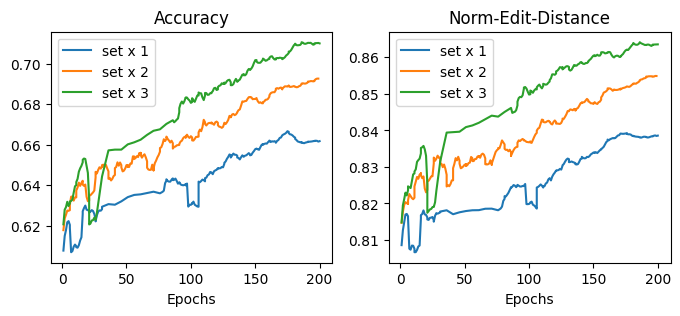

,work_id,version,task,acc,norm_edit_dis,fps
0,rec_PPOCR_sangmu_and_outsourcing_final_v7_2,162.0,train,0.932410,0.975414,3376.069964
0,rec_PPOCR_sangmu_and_outsourcing_final_v7_2,162.0,eval,0.696532,0.851889,725.245714


In [8]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

# for work in ["det_PPOCR_sangmu", "det_PPOCR_outsourcing", "det_PPOCR_sangmu_and_outsourcing"]:
#     workdb.draw_det_graph(work, window=10)
#     plt.savefig(f"{work}.svg", format="svg")
#     plt.show()

labels = ["set x 1", "set x 2", "set x 3"]
for i, work in enumerate(["rec_PPOCR_sangmu_and_outsourcing_final_v7_1", "rec_PPOCR_sangmu_and_outsourcing_final_v7_2", "rec_PPOCR_sangmu_and_outsourcing_final_v7_3"]):
    workdb.draw_rec_graph_v2(work, window=10, tasks=["eval"], labels=[labels[i]])
    # plt.savefig(f"{work}.svg", format="svg")
plt.show()

epoch = workdb.get_best_epoch("rec_PPOCR_sangmu_and_outsourcing_final_v7_2", criteria="eval")
df = workdb.get_report_df("rec_PPOCR_sangmu_and_outsourcing_final_v7_2")
df[df["version"] == epoch]


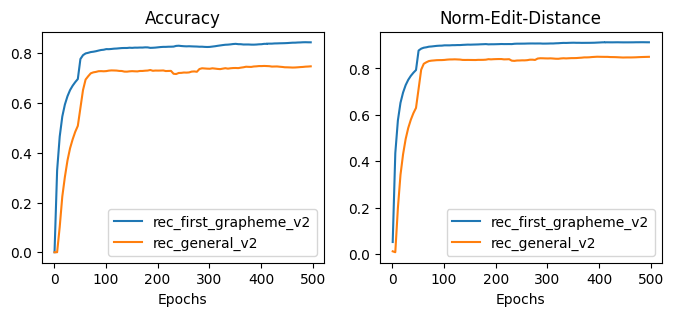

In [26]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

# for work in ["det_PPOCR_sangmu", "det_PPOCR_outsourcing", "det_PPOCR_sangmu_and_outsourcing"]:
#     workdb.draw_det_graph(work, window=10)
#     plt.savefig(f"{work}.svg", format="svg")
#     plt.show()

for i, work in enumerate(["rec_first_grapheme_v2", "rec_general_v2"]):
    workdb.draw_rec_graph_v2(work, window=10, tasks=["test"], labels = [work, work])
    # plt.savefig(f"{work}.svg", format="svg")
plt.show()

# epoch = workdb.get_best_epoch("rec_PPOCR_sangmu_and_outsourcing_final_v7_2", criteria="eval")
# df = workdb.get_report_df("rec_PPOCR_sangmu_and_outsourcing_final_v7_2")
# df[df["version"] == epoch]


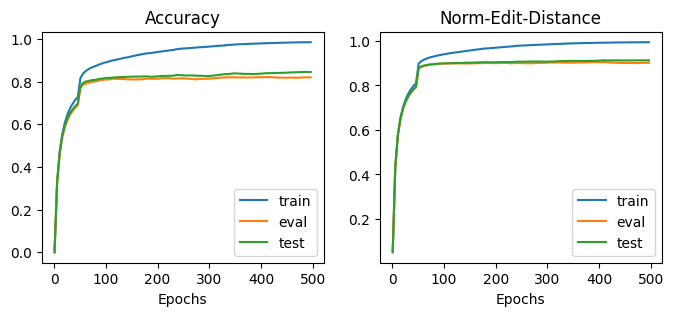

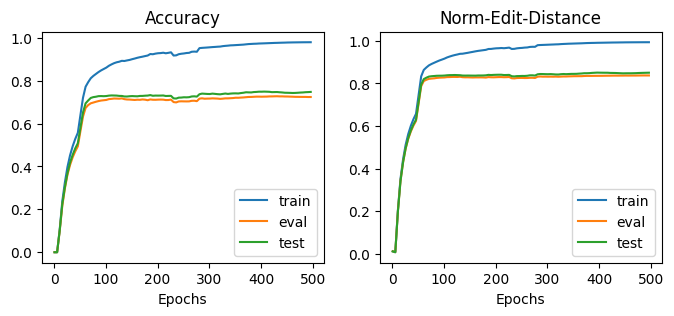

In [25]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

# for work in ["det_PPOCR_sangmu", "det_PPOCR_outsourcing", "det_PPOCR_sangmu_and_outsourcing"]:
#     workdb.draw_det_graph(work, window=10)
#     plt.savefig(f"{work}.svg", format="svg")
#     plt.show()

for work in ["rec_first_grapheme_v2", "rec_general_v2"]:
    workdb.draw_rec_graph(work, window=10)
    plt.savefig(f"{work}.svg", format="svg")
    plt.show()




In [2]:
from database import * 
WorkDB().get_best_report("rec_PPOCR_sangmu_v2")

,work_id,version,task,acc,norm_edit_dis,fps
0,rec_PPOCR_sangmu_v2,101.0,train,0.806279,0.878972,754.814047
0,rec_PPOCR_sangmu_v2,101.0,eval,0.358025,0.595355,109.115583
0,rec_PPOCR_sangmu_v2,101.0,test,0.467066,0.652581,97.048198


In [3]:
from database import * 
WorkDB().get_best_report("rec_PPOCR_full_auto_rotate_v2")

,work_id,version,task,acc,norm_edit_dis,fps
0,rec_PPOCR_full_auto_rotate_v2,200.0,train,0.937888,0.972739,4034.681605
0,rec_PPOCR_full_auto_rotate_v2,200.0,eval,0.923578,0.966123,3942.135825
0,rec_PPOCR_full_auto_rotate_v2,200.0,test,0.569550,0.759530,2063.095575


In [4]:
from database import * 
WorkDB().get_best_report("rec_PPOCR_full_v1")

,work_id,version,task,acc,norm_edit_dis,fps
0,rec_PPOCR_full_v1,32.0,test,0.457439,0.668838,2478.250553
0,rec_PPOCR_full_v1,32.0,train,0.873733,0.934574,4271.317669
0,rec_PPOCR_full_v1,32.0,eval,0.867071,0.930581,4095.115212


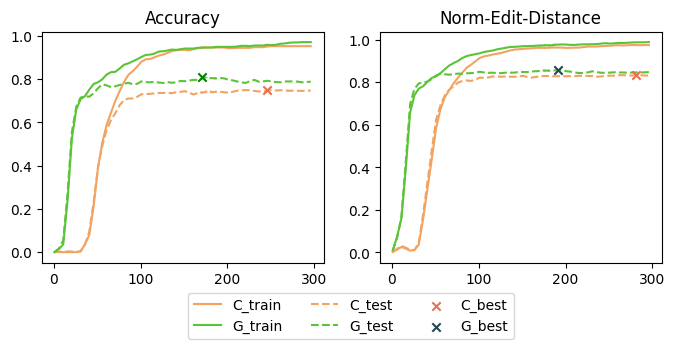

In [1]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

def smooth(x, window):
    new = []
    for i in range(len(x)):
        r = max(i-window+1, 0)
        q = i
        new.append(sum(x[r:q+1])/(q-r+1))
    return new

plt.gcf().set_size_inches(8, 3)
    
window=2
plt.subplot(1, 2, 1)
plt.title(f"Accuracy")
df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["character_acc"], window=window)
plt.plot(task_df["version"], data, label="G_test", color=(243/255, 163/255, 97/255))
        
task_df = df[df["task"] == "test"]
data = smooth(task_df["character_acc"], window=window)
plt.plot(task_df["version"], data, "--", label="G_test", color=(243/255, 163/255, 97/255))



df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["composed_acc"], window=window)
plt.plot(task_df["version"], data, label="C_test", color=(91/255, 196/255, 54/255))
        
task_df = df[df["task"] == "test"]
data = smooth(task_df["composed_acc"], window=window)
plt.plot(task_df["version"], data, "--",  label="C_test", color=(91/255, 196/255, 54/255))

plt.scatter(246, 0.752, marker="x", color=(232/255, 112/255, 82/255), zorder=2)
plt.scatter(171, 0.809, marker="x", color="green", zorder=2)





plt.subplot(1, 2, 2)
plt.title(f"Norm-Edit-Distance")
df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["character_norm_edit_dis"], window=window)
ctr = plt.plot(task_df["version"], data, label="C_train", color=(243/255, 163/255, 97/255))

df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "train"]
data = smooth(task_df["composed_norm_edit_dis"], window=window)
gtr = plt.plot(task_df["version"], data, label="G_train", color=(91/255, 196/255, 54/255))
        

df = workdb.get_report_df("rec_grapheme_10000_C").sort_values("version")
task_df = df[df["task"] == "test"]
data = smooth(task_df["character_norm_edit_dis"], window=window)
ct = plt.plot(task_df["version"], data, "--", label="C_test", color=(243/255, 163/255, 97/255))

df = workdb.get_report_df("rec_grapheme_10000_G").sort_values("version")
task_df = df[df["task"] == "test"]
data = smooth(task_df["composed_norm_edit_dis"], window=window)
gt = plt.plot(task_df["version"], data, "--",  label="G_test", color=(91/255, 196/255, 54/255))


cp = plt.scatter(281, 0.834, marker="x", color=(232/255, 112/255, 82/255), zorder=2, label="C_best")
gp = plt.scatter(191, 0.858, marker="x", color=(38/255, 70/255, 84/255), zorder=2, label="G_best")   
# 


plt.legend( bbox_to_anchor=(0.5, -0.1), ncol=3)


# workdb.draw_rec_graph_v2("rec_grapheme_10000_C", window=2, metrics = ["character_acc", "character_norm_edit_dis"], tasks=["train", "test"], labels = ["G_train", "G_test"])
# workdb.draw_rec_graph_v2("rec_grapheme_10000_G", window=2, metrics = ["composed_acc", "composed_norm_edit_dis"], tasks=["train", "test"], labels = ["G_train", "G_test"])

In [41]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()
workdb.get_best_report("rec_grapheme_10000_horizontal_C", criteria="test", metric="character_norm_edit_dis")

# 246 0.895
# 241 0.951

# 266 0.834
# 266 0.919


,work_id,version,task,character_acc,character_norm_edit_dis,fps
0,rec_grapheme_10000_horizontal_C,266.0,train,1.000000,1.000000,2156.879082
0,rec_grapheme_10000_horizontal_C,266.0,eval,0.846311,0.925534,480.799615
0,rec_grapheme_10000_horizontal_C,266.0,test,0.834016,0.919823,322.248452


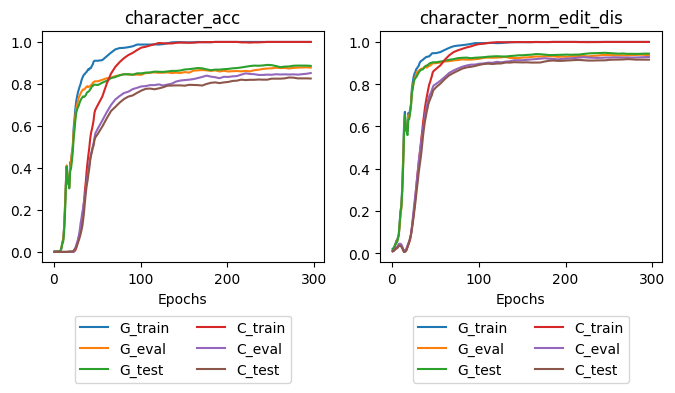

In [48]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()
plt = workdb.draw_rec_graph_v2("rec_grapheme_10000_horizontal_G", window=3, metrics = ["composed_acc", "composed_norm_edit_dis"], tasks=["train", "eval", "test"], labels = ["G_train", "G_eval", "G_test"])
plt = workdb.draw_rec_graph_v2("rec_grapheme_10000_horizontal_C", window=3, metrics = ["character_acc", "character_norm_edit_dis"], tasks=["train", "eval", "test"], labels = ["C_train", "C_eval", "C_test"])
# workdb.draw_rec_graph_v2("rec_grapheme_10000_", window=2, metrics = ["character_acc", "character_norm_edit_dis"], tasks=["test"], labels = ["third_character"])
# workdb.draw_rec_graph_v2("rec_grapheme_10000_third", window=2, metrics = ["composed_acc", "composed_norm_edit_dis"], tasks=["test"], labels = ["third_composed"])

In [5]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()
workdb.get_report_df("rec_grapheme_20k_horizontal_C+FML").columns

Index(['work_id', 'version', 'task', 'C|First|Acc|X', 'C|First|C_NED|X',
       'C|First|Acc|O', 'C|First|C_NED|O', 'C|Character|Acc|X',
       'C|Character|C_NED|X', 'C|Character|G_NED|X', 'C|Character|Acc|O',
       'C|Character|C_NED|O', 'C|Character|G_NED|O', 'C|Second|Acc|X',
       'C|Second|C_NED|X', 'C|Second|Acc|O', 'C|Second|C_NED|O',
       'C|Third|Acc|X', 'C|Third|C_NED|X', 'C|Third|Acc|O', 'C|Third|C_NED|O',
       'G|First|Acc|X', 'G|First|C_NED|X', 'G|First|Acc|O', 'G|First|C_NED|O',
       'G|Second|Acc|X', 'G|Second|C_NED|X', 'G|Second|Acc|O',
       'G|Second|C_NED|O', 'G|Third|Acc|X', 'G|Third|C_NED|X', 'G|Third|Acc|O',
       'G|Third|C_NED|O', 'G|Character|Acc|X', 'G|Character|C_NED|X',
       'G|Character|G_NED|X', 'G|Character|Acc|O', 'G|Character|C_NED|O',
       'G|Character|G_NED|O', 'E|Character|Acc|X', 'E|Character|C_NED|X',
       'E|Character|G_NED|X', 'E|Character|Acc|O', 'E|Character|C_NED|O',
       'E|Character|G_NED|O', 'fps'],
      dtype='object')

KeyError: 'C|First|C_NED|X'

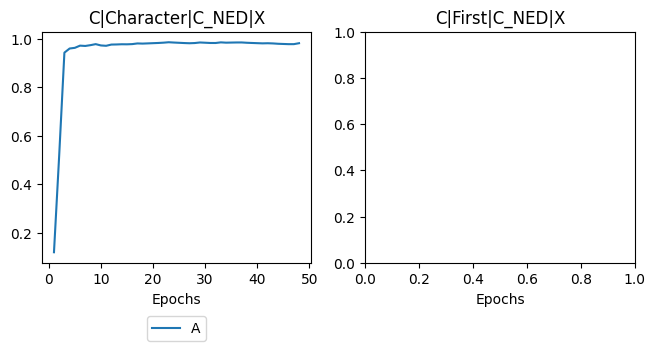

In [7]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()
window = 2
ignore = "X"
Metric = "Acc"
Metric = "C_NED"

# plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_G_v1.0", window=window, metrics = [f"G|Character|{Metric}|{ignore}", f"G|First|{Metric}|{ignore}", f"G|Second|{Metric}|{ignore}", f"G|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["A"])
plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C_v1.0", window=window, metrics = [f"C|Character|{Metric}|{ignore}", f"C|First|{Metric}|{ignore}", f"C|Second|{Metric}|{ignore}", f"C|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["A"])

plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.1", window=window, metrics = [f"C|Character|{Metric}|{ignore}", f"C|First|{Metric}|{ignore}", f"C|Second|{Metric}|{ignore}", f"C|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["B"])
plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.1", window=window, metrics = [f"G|Character|{Metric}|{ignore}", f"G|First|{Metric}|{ignore}", f"G|Second|{Metric}|{ignore}", f"G|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["C"])
plt.gcf().set_size_inches(8, 15)
plt.show()

# plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.1", window=window, metrics = [f"C|Character|{Metric}|{ignore}", f"C|First|{Metric}|{ignore}", f"C|Second|{Metric}|{ignore}", f"C|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["green"])
# plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.1", window=window, metrics = [f"G|Character|{Metric}|{ignore}", f"G|First|{Metric}|{ignore}", f"G|Second|{Metric}|{ignore}", f"G|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["green"])
# plt.gcf().set_size_inches(8, 15)
# plt.show()


# plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.4", window=window, metrics = [f"C|Character|{Metric}|{ignore}", f"C|First|{Metric}|{ignore}", f"C|Second|{Metric}|{ignore}", f"C|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["green"])
# plt = workdb.draw_rec_graph_v2("rec_grapheme_full_horizontal_C+FML_v1.4", window=window, metrics = [f"G|Character|{Metric}|{ignore}", f"G|First|{Metric}|{ignore}", f"G|Second|{Metric}|{ignore}", f"G|Third|{Metric}|{ignore}"], tasks=["test"], labels = ["green"])
# plt.gcf().set_size_inches(8, 15)
# plt.show()


